In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.9.1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

We use drop_first so that when both germany and spain are 0 we can tell that france is present, i.e; we can use only 2 columns to represent al 3 columns 

'Same for Gender column also'

In [9]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [10]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [11]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Germany          10000 non-null  uint8  
 9   Spain            10000 non-null  uint8  
 10  Male             10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [17]:
X_train.shape

(8000, 11)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [19]:
#initialize ANN
classifier=Sequential()

2023-01-27 15:50:59.237550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
#adding input layer
classifier.add(Dense(units=11))
#here units refer how many neurons we need(Since this is the first layer this layer becomes input layer)
#activation reffers activation function to be used in the layer

In [21]:
#first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [22]:
#2nd HL
classifier.add(Dense(units=6, activation='relu'))

In [23]:
#output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [24]:
#used adam optimizer
#used binary cross entropy loss function
#used accuracy as evultion metrics
#default learning rate will be 0.01
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [25]:
#if we need to change the learning rate then follow the below steps
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

monitor: Quantity to be monitored.

min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

patience: Number of epochs with no improvement after which training will be stopped.

verbose: Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.

mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.

baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.

restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set.

start_from_epoch: Number of epochs to wait before starting to monitor improvement. This allows for a warm-up period in which no improvement is expected and thus training will not be stopped.

In [26]:
#early stopping
import tensorflow as tf
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

##### val_loss is the value of cost function for your cross-validation data and loss is the value of cost function for your training data. 

In [27]:
#validation split again splits the tarating data at 33% to text the model
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stop)

Epoch 1/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4904 - accuracy: 0.7931 - val_loss: 0.4427 - val_accuracy: 0.8005
Epoch 2/1000
536/536 [==============================] - 0s 791us/step - loss: 0.4276 - accuracy: 0.8164 - val_loss: 0.4309 - val_accuracy: 0.8156
Epoch 3/1000
536/536 [==============================] - 0s 789us/step - loss: 0.4179 - accuracy: 0.8250 - val_loss: 0.4235 - val_accuracy: 0.8175
Epoch 4/1000
536/536 [==============================] - 0s 795us/step - loss: 0.4099 - accuracy: 0.8296 - val_loss: 0.4180 - val_accuracy: 0.8213
Epoch 5/1000
536/536 [==============================] - 0s 789us/step - loss: 0.4030 - accuracy: 0.8291 - val_loss: 0.4116 - val_accuracy: 0.8201
Epoch 6/1000
536/536 [==============================] - 0s 790us/step - loss: 0.3964 - accuracy: 0.8302 - val_loss: 0.4024 - val_accuracy: 0.8232
Epoch 7/1000
536/536 [==============================] - 0s 802us/step - loss: 0.3893 - accuracy: 0.8311 - val_loss: 0.3989 - v

Epoch 57/1000
536/536 [==============================] - 0s 792us/step - loss: 0.3339 - accuracy: 0.8638 - val_loss: 0.3585 - val_accuracy: 0.8561
Epoch 58/1000
536/536 [==============================] - 0s 788us/step - loss: 0.3348 - accuracy: 0.8628 - val_loss: 0.3608 - val_accuracy: 0.8546
Epoch 59/1000
536/536 [==============================] - 0s 789us/step - loss: 0.3335 - accuracy: 0.8623 - val_loss: 0.3591 - val_accuracy: 0.8535
Epoch 60/1000
536/536 [==============================] - 0s 788us/step - loss: 0.3342 - accuracy: 0.8634 - val_loss: 0.3575 - val_accuracy: 0.8554
Epoch 61/1000
536/536 [==============================] - 0s 791us/step - loss: 0.3342 - accuracy: 0.8640 - val_loss: 0.3594 - val_accuracy: 0.8546
Epoch 62/1000
536/536 [==============================] - 0s 787us/step - loss: 0.3345 - accuracy: 0.8608 - val_loss: 0.3607 - val_accuracy: 0.8565
Epoch 63/1000
536/536 [==============================] - 0s 791us/step - loss: 0.3340 - accuracy: 0.8621 - val_loss: 0

In [28]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


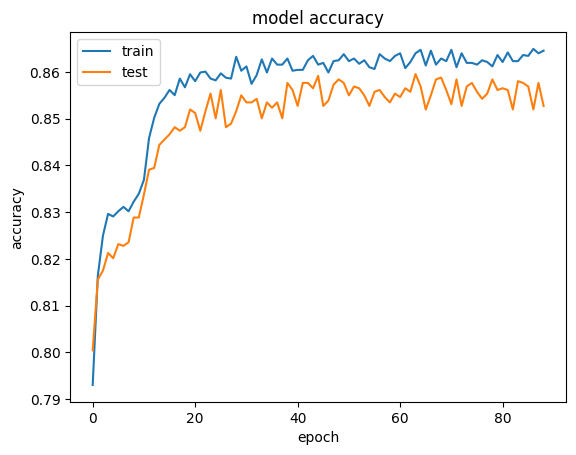

In [29]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

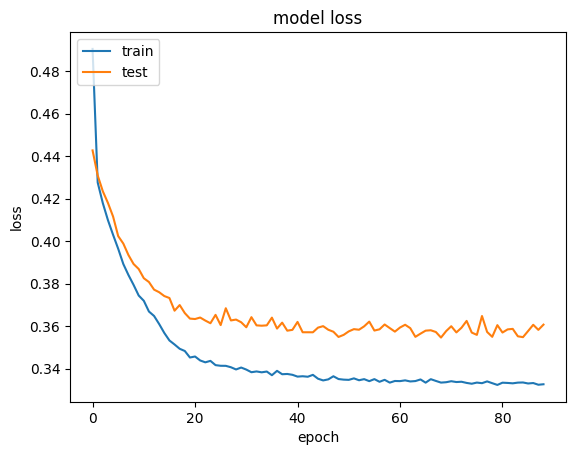

In [30]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
#sigmoid returns the output values in probabality
# to classify the output value we are setting a threshould values as 0.5
#if value = <0.5 then 0 or 1
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 430us/step
[[0.31962404]
 [0.44095916]
 [0.21744806]
 ...
 [0.16056396]
 [0.1615729 ]
 [0.24692854]]


In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1492,  103],
       [ 184,  221]])

In [33]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8565